### Setup the Spark VM and complete the below assignment

Objective:- Build a ML model to predict the employee compensation.
The application should be modelled using Spark.

You can refer to the below links for spark commands:- 
- https://spark.apache.org/docs/latest/ml-pipeline.html

- https://github.com/spark-in-action/first-edition

- https://github.com/FavioVazquez/first_spark_model

# Predicting Employee Compensation

## Data Dictionary
<br>**Year Type** - Fiscal (July through June) or Calendar (January through December)
<br>**Year** - An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.
<br>**Organization Group Code** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,Fire, Adult Probation, District Attorney, and Sheriff.
<br> **Organization Group** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,
Fire, Adult Probation, District Attorney, and Sheriff.
<br>**Department Code** - Departments are the primary organizational unit used by the Cityand County of San Francisco. Examples include Recreation and
Parks, Public Works, and the Police Department.
<br>**Department Code** - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.
<br>**Union Code** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Union** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Job Family Code** Job Family combines similar Jobs into meaningful groups.
<br>**Job Family** Job Family combines similar Jobs into meaningful groups.
<br>**Employee Identifier** Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the
Employee Compensation report hosted on openbook.sfgov.org,
but that report does show one row for each employee. Employee
ID has been included here to allow users to reconstruct the
original report. Note that each employee’s identifier will change
each time this dataset is updated, so comparisons by employee
across multiple versions of the dataset are not possible.
<br>**Salaries** - Normal salaries paid to permanent or temporary City employees.
<br>**Overtime** - Amounts paid to City employees working in excess of 40 hours
per week.
<br>**Other Salaries** - Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. Total Salary Number The sum of all salaries paid to City employees.
<br>**Retirement** City contributions to employee retirement plans.
<br>**Health/Dental** City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits.
<br>**Other Benefits** Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment
insurance premiums, and minor discretionary benefits not included in the above categories.
<br>**Total Benefits** The sum of all benefits paid to City employees.
<br>**Total Compensation** The sum of all salaries and benefits paid to City employees.

Read the data and answer the following questions to predict employee compensation

## 1. Read the Data

In [111]:
import findspark
from pyspark.sql import SparkSession
from pyspark import SparkFiles
spark = SparkSession.builder.appName('Assignment').getOrCreate()
spark

In [112]:
df = spark.read.csv("Employee_Compensation.csv",inferSchema=True, header= True)

### 1.1 Display the number of rows and columns in the dataset

In [113]:
row = df.count()
col = len(df.columns)
print(f'The number of rows and columns in the dataset: {(row,col)}')

The number of rows and columns in the dataset: (291825, 22)


### 1.2 Check the datatype of the variables

In [115]:
df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



### 2. Convert the incorrect column type into its suitable column type. And drop the redundant features

In [118]:
from pyspark.sql.types import StringType
df = df.withColumn('Year', df['Year'].cast(StringType()))

In [119]:
df = df.drop("Organization Group Code", "Department Code", "Department", "Union Code", "Union", "Job Family Code", "Job Code", "Employee Identifier")

In [120]:
df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



### 3. Check basic statistics and perform necessary data preprocessing (Like removing negative amount)

In [75]:
#df.summary().show()

In [121]:
#Removing rows having negative amounts
from pyspark.sql.functions import *

df1_filtered = df.select("Year Type", "Year", "Organization Group", "Job Family", "Job", "Salaries", "Overtime", "Other Salaries", "Total Salary", "Retirement", "Health/Dental", "Other Benefits", "Total Benefits", "Total Compensation") .where((col("Salaries") >= 0) & (col("Overtime") >= 0) & (col("Other Salaries") >= 0) & (col("Retirement") >= 0) & (col("Health/Dental") >= 0) & (col("Other Benefits") >= 0) & (col("Total Compensation") >= 0))

In [122]:
df1_filtered.count()

290391

### 4. Perform Missing Value Analysis

In [123]:
from pyspark.sql.functions import *
df1_filtered.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+---------+----+------------------+----------+---+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group|Job Family|Job|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+------------------+----------+---+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|        0|   0|                 0|        45|  0|       0|       0|             0|           0|         0|            0|             0|             0|                 0|
+---------+----+------------------+----------+---+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+



In [124]:
df2 = df1_filtered.dropna()

In [125]:
df2.count()

290346

### 5. Exploratory Data Analysis

#### 5.1. Find top compensating organizations. Display using bar plot

<Axes: xlabel='Organization Group'>

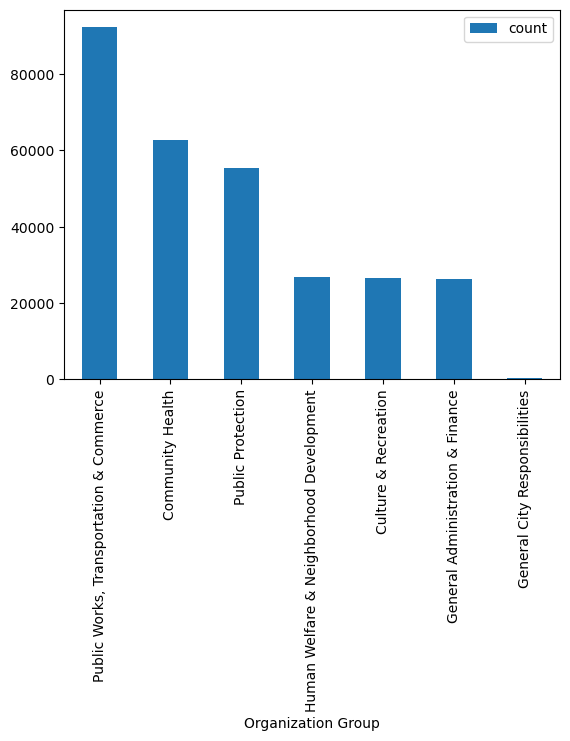

In [126]:
import matplotlib.pyplot as plt    
pyspark_df = df2.groupBy('Organization Group').count().orderBy('count', ascending=False)
pandas_df = pyspark_df.limit(10).toPandas()
pandas_df.plot.bar(x='Organization Group', y=None)

#### 5.2. Find top Compensating Jobs. Display using bar plot

<Axes: xlabel='Job'>

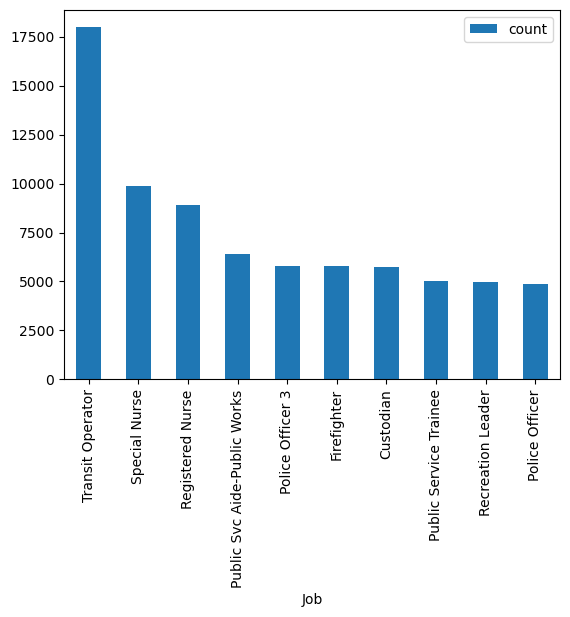

In [127]:
import matplotlib.pyplot as plt    
pyspark_df = df2.groupBy('Job').count().orderBy('count', ascending=False)
pandas_df = pyspark_df.limit(10).toPandas()
pandas_df.plot.bar(x='Job', y=None)

#### 5.3. Check Correlation of Target Variable with Other Independent Variables. Plot Heatmap

In [128]:
p_df = df2.toPandas()

In [129]:
correlation_matrix = p_df.corr()
correlation_matrix

C:\Users\91958\AppData\Local\Temp\ipykernel_23600\2406210574.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = p_df.corr()


,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Salaries,1.000000,0.270228,0.330714,0.960523,0.953110,0.773081,0.695978,0.937921,0.972585
Overtime,0.270228,1.000000,0.353004,0.495378,0.312645,0.311475,0.060095,0.286528,0.452788
Other Salaries,0.330714,0.353004,1.000000,0.503876,0.347466,0.216159,0.041300,0.274845,0.456447
Total Salary,0.960523,0.495378,0.503876,1.000000,0.931921,0.758621,0.613673,0.902772,0.994316
Retirement,0.953110,0.312645,0.347466,0.931921,1.000000,0.793679,0.669936,0.965377,0.957334
Health/Dental,0.773081,0.311475,0.216159,0.758621,0.793679,1.000000,0.597070,0.888671,0.804758
Other Benefits,0.695978,0.060095,0.041300,0.613673,0.669936,0.597070,1.000000,0.790227,0.668657
Total Benefits,0.937921,0.286528,0.274845,0.902772,0.965377,0.888671,0.790227,1.000000,0.943435
Total Compensation,0.972585,0.452788,0.456447,0.994316,0.957334,0.804758,0.668657,0.943435,1.000000


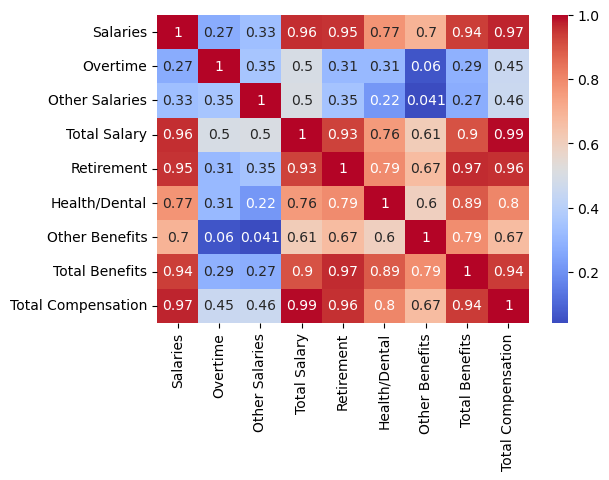

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6,4))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot=True)
plt.show()

### 6. Perform necessary data pre-processing and divide the data into train and test set

### 6.1 Categorise the attributes into its type (Use one hot encoding wherever required)

In [131]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCols=["Year Type", "Year", "Organization Group", "Job Family", "Job"], outputCols=["YearType_indexed", "Year_indexed", "OrganizationGroup__indexed", "Job Family_indexed", "Job_indexed"])
indexed = indexer.fit(df2).transform(df2)
indexed.show()


+---------+----+--------------------+--------------------+--------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------+------------+--------------------------+------------------+-----------+
|Year Type|Year|  Organization Group|          Job Family|                 Job| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|YearType_indexed|Year_indexed|OrganizationGroup__indexed|Job Family_indexed|Job_indexed|
+---------+----+--------------------+--------------------+--------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------+------------+--------------------------+------------------+-----------+
|   Fiscal|2016|   Public Protection|       Legal & Court|Attorney (Civil/C...|114473.16|     0.0|        1500.0|   115973.16|  21025

In [132]:
indexed.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)
 |-- YearType_indexed: double (nullable = false)
 |-- Year_indexed: double (nullable = false)
 |-- OrganizationGroup__indexed: double (nullable = false)
 |-- Job Family_indexed: double (nullable = false)
 |-- Job_indexed: double (nullable = false)



In [133]:
from pyspark.ml.feature import OneHotEncoder
encoder = OneHotEncoder(inputCols=["YearType_indexed", "Year_indexed", "OrganizationGroup__indexed", "Job Family_indexed", "Job_indexed"],outputCols=["YearType_Vec", "Year_Vec", "OrganizationGroup_Vec", "Job Family_Vec", "Job_Vec"])
model = encoder.fit(indexed)
encoded = model.transform(indexed)
encoded.columns

['Year Type',
 'Year',
 'Organization Group',
 'Job Family',
 'Job',
 'Salaries',
 'Overtime',
 'Other Salaries',
 'Total Salary',
 'Retirement',
 'Health/Dental',
 'Other Benefits',
 'Total Benefits',
 'Total Compensation',
 'YearType_indexed',
 'Year_indexed',
 'OrganizationGroup__indexed',
 'Job Family_indexed',
 'Job_indexed',
 'YearType_Vec',
 'Year_Vec',
 'OrganizationGroup_Vec',
 'Job Family_Vec',
 'Job_Vec']

In [134]:
from pyspark.ml.feature import VectorAssembler
featureassembler = VectorAssembler(inputCols= ["Salaries", "Overtime", "Other Salaries", "Total Salary", "Retirement", "Health/Dental", "Other Benefits", "Total Benefits", "YearType_Vec", "Year_Vec", "OrganizationGroup_Vec", "Job Family_Vec", "Job_Vec"], outputCol= "Independent Features")
output = featureassembler.transform(encoded)

In [135]:
output.select('Independent Features').show()

+--------------------+
|Independent Features|
+--------------------+
|(1206,[0,2,3,4,5,...|
|(1206,[0,3,4,5,6,...|
|(1206,[0,2,3,5,6,...|
|(1206,[0,3,5,6,7,...|
|(1206,[0,2,3,5,6,...|
|(1206,[0,3,4,5,6,...|
|(1206,[0,2,3,4,5,...|
|(1206,[0,2,3,4,5,...|
|(1206,[0,1,2,3,4,...|
|(1206,[0,1,2,3,4,...|
|(1206,[0,3,5,6,7,...|
|(1206,[0,1,3,4,5,...|
|(1206,[0,1,2,3,4,...|
|(1206,[0,1,2,3,4,...|
|(1206,[0,2,3,4,5,...|
|(1206,[0,2,3,4,5,...|
|(1206,[0,1,2,3,4,...|
|(1206,[0,1,2,3,4,...|
|(1206,[0,2,3,4,5,...|
|(1206,[0,1,2,3,4,...|
+--------------------+
only showing top 20 rows



In [136]:
output.show()

+---------+----+--------------------+--------------------+--------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------+------------+--------------------------+------------------+-----------+-------------+-------------+---------------------+---------------+------------------+--------------------+
|Year Type|Year|  Organization Group|          Job Family|                 Job| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|YearType_indexed|Year_indexed|OrganizationGroup__indexed|Job Family_indexed|Job_indexed| YearType_Vec|     Year_Vec|OrganizationGroup_Vec| Job Family_Vec|           Job_Vec|Independent Features|
+---------+----+--------------------+--------------------+--------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------

In [137]:
finalized_data = output.select("Independent Features","Total Compensation")

In [138]:
finalized_data.show()

+--------------------+------------------+
|Independent Features|Total Compensation|
+--------------------+------------------+
|(1206,[0,2,3,4,5,...|         159436.65|
|(1206,[0,3,4,5,6,...|         120054.05|
|(1206,[0,2,3,5,6,...|          13868.64|
|(1206,[0,3,5,6,7,...|            3718.5|
|(1206,[0,2,3,5,6,...|          10128.64|
|(1206,[0,3,4,5,6,...|          69974.15|
|(1206,[0,2,3,4,5,...|          44339.38|
|(1206,[0,2,3,4,5,...|          59969.97|
|(1206,[0,1,2,3,4,...|          52532.31|
|(1206,[0,1,2,3,4,...|         133258.56|
|(1206,[0,3,5,6,7,...|          10002.16|
|(1206,[0,1,3,4,5,...|          86349.47|
|(1206,[0,1,2,3,4,...|          122056.2|
|(1206,[0,1,2,3,4,...|         116670.53|
|(1206,[0,2,3,4,5,...|         118322.49|
|(1206,[0,2,3,4,5,...|         147672.72|
|(1206,[0,1,2,3,4,...|          85094.84|
|(1206,[0,1,2,3,4,...|         145696.65|
|(1206,[0,2,3,4,5,...|         237468.21|
|(1206,[0,1,2,3,4,...|          172624.7|
+--------------------+------------

### 6.2 Split the data into train and test set

In [139]:
train_data, test_data = finalized_data.randomSplit([0.75, 0.25])

### 7. Fit Linear Regression model on the data and check its performance

In [140]:
from pyspark.ml.regression import LinearRegression
#train_data, test_data = finalized_data.randomSplit([0.75, 0.25])
regressor = LinearRegression(featuresCol='Independent Features', labelCol='Total Compensation')
regressor = regressor.fit(train_data)

In [141]:
pred_results = regressor.evaluate(test_data)

In [142]:
pred_results.predictions.show()

+--------------------+------------------+------------------+
|Independent Features|Total Compensation|        prediction|
+--------------------+------------------+------------------+
|(1206,[0,1,2,3,4,...|           5334.44| 5333.596336374366|
|(1206,[0,1,2,3,4,...|          12397.69|12396.907737948586|
|(1206,[0,1,2,3,4,...|           13068.1|13067.322747203998|
|(1206,[0,1,2,3,4,...|           12864.2| 12863.42323855341|
|(1206,[0,1,2,3,4,...|          15328.04|15327.274311956831|
|(1206,[0,1,2,3,4,...|          20108.11|20107.381325522216|
|(1206,[0,1,2,3,4,...|          19849.71| 19848.98180687366|
|(1206,[0,1,2,3,4,...|          25881.16|25880.479670321078|
|(1206,[0,1,2,3,4,...|          30858.31|  30857.6704778879|
|(1206,[0,1,2,3,4,...|          30876.56|30875.919958962597|
|(1206,[0,1,2,3,4,...|          31534.22| 31533.59991465198|
|(1206,[0,1,2,3,4,...|          31157.11| 31156.47565455304|
|(1206,[0,1,2,3,4,...|          32050.78|32050.151028857497|
|(1206,[0,1,2,3,4,...|  

In [143]:
pred_results.r2, pred_results.meanAbsoluteError, pred_results.meanSquaredError

(0.9999999991436059, 0.3888621225147185, 3.9089282653240165)

### 8. Fit Decision Tree Regression model on the data and check its performance (Optional)

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='scaled_features', labelCol = 'Total Compensation')
dt_model = dt.fit(trainDF)

### Model Persistence (Optional)
Model persistence means saving your model to a disk. After you finalize your model for prediction depending upon the performance, you need to save the model to the disk. Let's say, you finalize 'lrmodel' to be used for in production environment i.e. in your application. We use the following code to save it.

##### Saving the model

In [ ]:
# use save() method to save the model
# write().overwrite() is usually used when you want to replace the older model with a new one
# It might happen that you wish to retrain your model and save it at the same the place
lrmodel.write().overwrite().save("/FileStore/models/lrmodel")

##### Loading the model

In [ ]:
# import PipelineModel from pyspark.ml package
from pyspark.ml import PipelineModel

# load the model from the location it is stored
# The loaded model acts as PipelineModel
pipemodel = PipelineModel.load("/FileStore/models/lrmodel")

# use the PipelineModel object to perform prediciton on test data. 
# Use .transform() to perfrom prediction
prediction = pipemodel.transform(testDF)

# print the results
prediction.select('label', 'rawPrediction', 'probability', 'prediction').show(5)